# B. Comparing the number of pairs found using,
### i. Polynomial Fit
### ii. Linear Shift of CH2 peaks -> Polynomial Fit

##### Through route i, 50 pairs are found whereas through route ii, 273 pairs are found. Therefore, it is preferable at this stage of the process to apply a linear shift before a polynomial fit as it enables more peaks to be sucessfully mapped. 

In [1]:
import sys
sys.path.append('../')
from smpy import *


### B.1 Importing Variables

Text(0.5, 1.0, 'Average Frame Image')

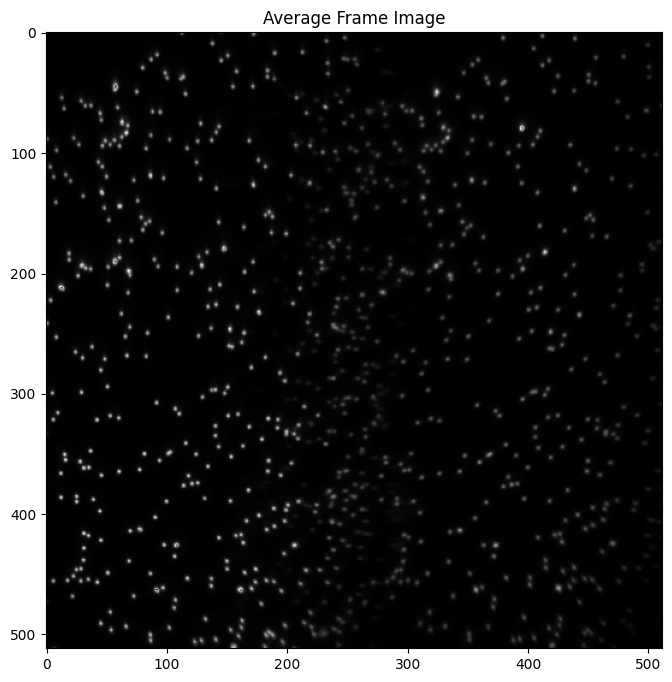

In [2]:
file_path = "../pma files/hel1.pma" 
image_path = "../User Guide - Two Colour/hel1_Avg/hel1_Avg_Frame.png"
CH1_img_path = "../User Guide - Two Colour/hel1_Avg/hel1_CH1_Avg_Frame.png"
CH2_img_path = "../User Guide - Two Colour/hel1_Avg/hel1_CH2_Avg_Frame.png"

image = io.imread(image_path, as_gray=True)
image_CH1 = io.imread(CH1_img_path, as_gray=True)  
image_CH2 = io.imread(CH2_img_path, as_gray=True)

plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title("Average Frame Image")

### B.2 Finding Good Peaks 

In [3]:
good_peaks_1_CH1, _ = find_good_peaks(CH1_img_path)
good_peaks_2_CH1, _ = find_good_peaks(CH2_img_path)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_CH1, [0, 256])

# B.i
### B.i.1 Polynomial Fit

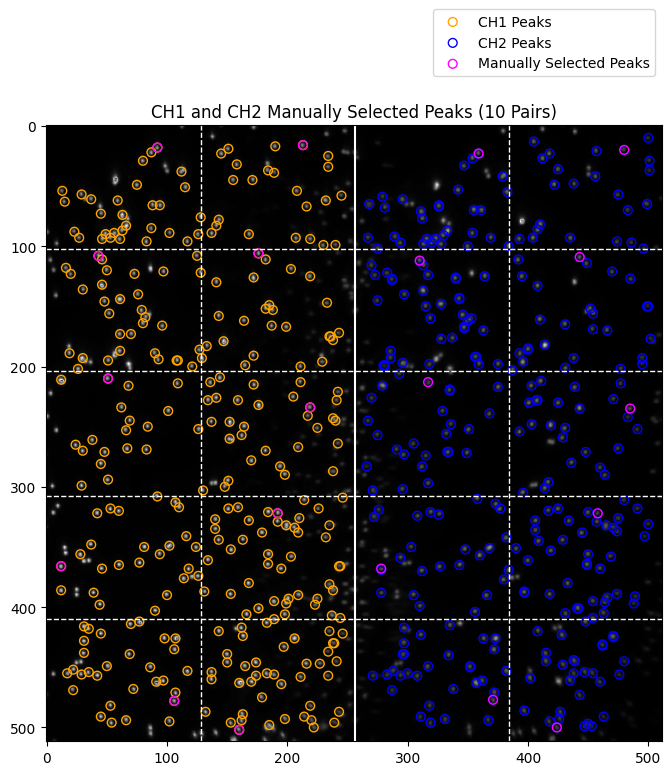

In [4]:
CH1_arr_no_linear_shift = np.array([[18,92], [16,213], [108,43], [106,176], [210,51], [234, 219], [366,12], [322,192], [478,106], [502,160]])
CH2_arr_no_linear_shift = np.array([[23,359], [20,480], [112,310], [109,443], [213,317], [235, 485], [368,278], [322,458], [477,371], [500,424]])

plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (10 Pairs)")
plt.imshow(image, cmap='gray')

plt.axhline(y=102, color="w", linestyle='--', linewidth=1)
plt.axhline(y=204, color="w", linestyle='--', linewidth=1)
plt.axhline(y=308, color="w", linestyle='--', linewidth=1)
plt.axhline(y=410, color="w", linestyle='--', linewidth=1)

plt.axvline(x=128, color="w", linestyle='--', linewidth=1)
plt.axvline(x=384, color="w", linestyle='--', linewidth=1)

plt.axvline(x=256, color="w", linestyle='-', linewidth=1.5)

plt.scatter(good_peaks_1_CH1[:,1], good_peaks_1_CH1[:,0], s=40, facecolor='none', edgecolor='orange', label='CH1 Peaks')
plt.scatter(good_peaks_2_CH2[:,1], good_peaks_2_CH2[:,0], s=40, facecolor='none', edgecolor='b', label='CH2 Peaks')
plt.scatter(CH1_arr_no_linear_shift[:,1], CH1_arr_no_linear_shift[:,0], s=40, facecolor='none', edgecolor='magenta', label='Manually Selected Peaks')
plt.scatter(CH2_arr_no_linear_shift[:,1], CH2_arr_no_linear_shift[:,0], s=40, facecolor='none', edgecolor='magenta')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
plt.show()

### B.i.2 Finding and applying parameters

In [5]:
params_x_no_shift, params_y_no_shift = find_polyfit_params(CH1_arr_no_linear_shift, CH2_arr_no_linear_shift, degree=3)

print("X-Mapping Parameters:", params_x_no_shift)
print("Y-Mapping Parameters:", params_y_no_shift)

mapped_peaks_no_shift = apply_polyfit_params(good_peaks_1_CH1, params_x_no_shift, params_y_no_shift).astype(np.uint16)
poly_pair_count_no_shift, poly_pair_CH1_no_shift, poly_pair_CH2_no_shift = find_pairs(good_peaks_1_CH1, mapped_peaks_no_shift, tolerance=4)
print("Number of Pairs Found:", poly_pair_count_no_shift)

X-Mapping Parameters: [ 1.40249323e-06 -4.17604040e-04  1.02809700e+00  2.65896256e+02]
Y-Mapping Parameters: [-6.43405067e-08  4.42739164e-05  9.80836912e-01  4.90618214e+00]
Number of Pairs Found: 50


### B.i.3 Displaying all found 

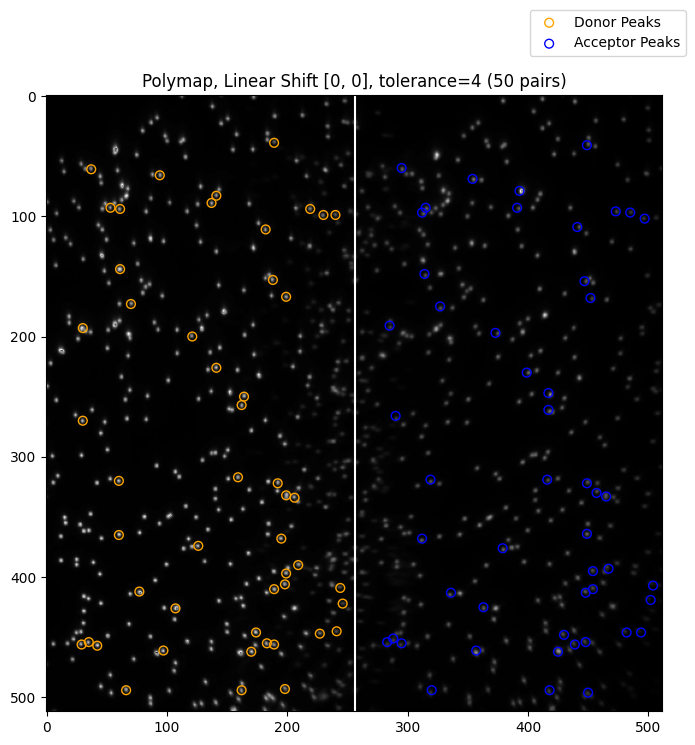

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(image, cmap="gray")
plt.title(f"Polymap, Linear Shift [0, 0], tolerance=4 ({len(poly_pair_CH1_no_shift)} pairs)")
plt.scatter(poly_pair_CH1_no_shift[:, 1], poly_pair_CH1_no_shift[:, 0], s=40, facecolors='none', edgecolors='orange', label='Donor Peaks')
plt.scatter(poly_pair_CH2_no_shift[:, 1], poly_pair_CH2_no_shift[:, 0], s=40, facecolors='none', edgecolors='b', label='Acceptor Peaks')
plt.axvline(x=256, color="w", linestyle='-', linewidth=1.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.15))

plt.show()

# B.ii (as described in User Guided + Project Review)
### B.ii.1 Polynomial Fit

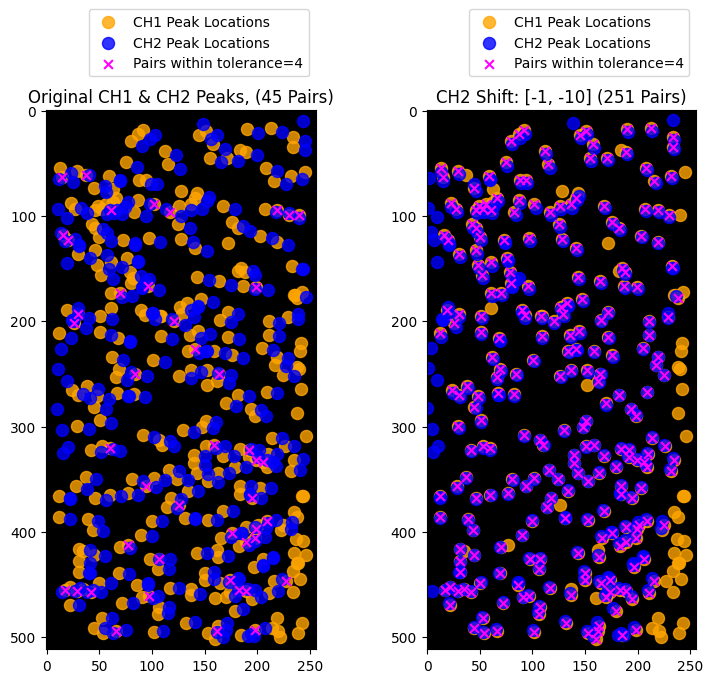

In [7]:
shift = [-1,-10]
tolerance = 4
good_peaks_2_shift = shift_peaks(good_peaks_2_CH1, shift=shift)

found_pairs_noshift_count, found_pairs_noshift_CH1, found_pairs_noshift_CH2 = find_pairs(good_peaks_1_CH1, good_peaks_2_CH1, tolerance=tolerance, Channel_count=1)
found_pairs_shift_count, found_pairs_shift_CH1, found_pairs_shift_CH2 = find_pairs(good_peaks_1_CH1, good_peaks_2_shift, tolerance=tolerance, Channel_count=1)

fig, axes = plt.subplots(1,2, figsize=(9, 7))

axes[0].imshow(np.zeros([512, 256]), cmap='gray')
axes[0].scatter(good_peaks_1_CH1[:,1], good_peaks_1_CH1[:,0], s=300, marker=".", alpha=0.8, color="orange", label='CH1 Peak Locations')
axes[0].scatter(good_peaks_2_CH1[:,1], good_peaks_2_CH1[:,0], s=300, marker=".", alpha=0.8, color="b", label='CH2 Peak Locations')
axes[0].scatter(found_pairs_noshift_CH1[:,1], found_pairs_noshift_CH1[:,0], s=40, marker="x", color="magenta", label=f'Pairs within tolerance={tolerance}')
axes[0].set_title(f"Original CH1 & CH2 Peaks, ({found_pairs_noshift_count} Pairs)")
axes[0].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

axes[1].imshow(np.zeros([512, 256]), cmap='gray')
axes[1].scatter(good_peaks_1_CH1[:,1], good_peaks_1_CH1[:,0], s=300, marker=".", alpha=0.8, color="orange", label='CH1 Peak Locations')
axes[1].scatter(good_peaks_2_shift[:,1], good_peaks_2_shift[:,0], s=300, marker=".", alpha=0.8, color="b", label='CH2 Peak Locations')
axes[1].scatter(found_pairs_shift_CH1[:,1], found_pairs_shift_CH1[:,0], s=40, marker="x", color="magenta", label=f'Pairs within tolerance={tolerance}')
axes[1].set_title(f"CH2 Shift: {shift} ({found_pairs_shift_count} Pairs)")
axes[1].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

plt.show()


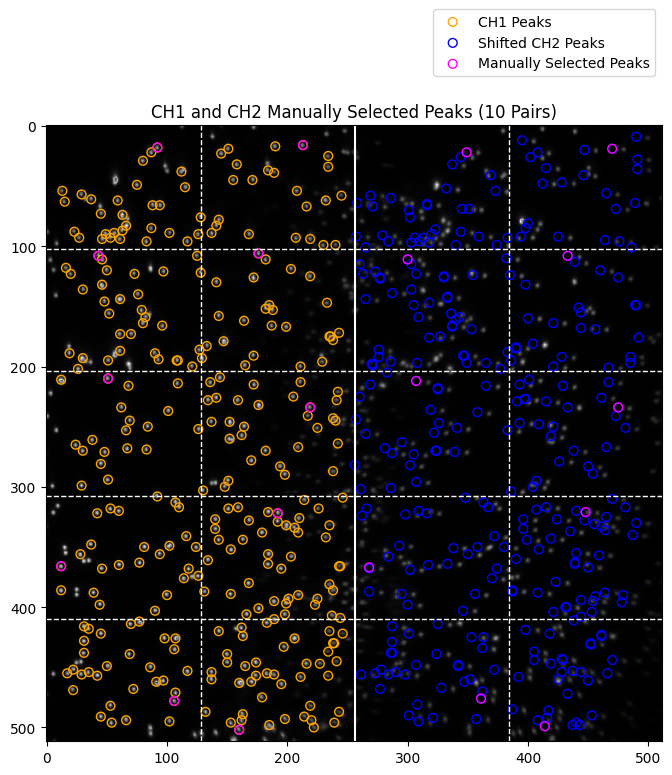

In [8]:
CH1_arr = np.array([[18,92], [16,213], [108,43], [106,176], [210,51], [234, 219], [366,12], [322,192], [478,106], [502,160]])
CH2_arr = np.array([[22,349], [19,470], [111,300], [108,433], [212,307], [234, 475], [367,268], [321,448], [476,361], [499,414]])
good_peaks_2_CH2_shift = shift_peaks(good_peaks_2_CH2, shift=[-1,-10])

plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (10 Pairs)")
plt.imshow(image, cmap='gray')

plt.axhline(y=102, color="w", linestyle='--', linewidth=1)
plt.axhline(y=204, color="w", linestyle='--', linewidth=1)
plt.axhline(y=308, color="w", linestyle='--', linewidth=1)
plt.axhline(y=410, color="w", linestyle='--', linewidth=1)

plt.axvline(x=128, color="w", linestyle='--', linewidth=1)
plt.axvline(x=384, color="w", linestyle='--', linewidth=1)

plt.axvline(x=256, color="w", linestyle='-', linewidth=1.5)

plt.scatter(good_peaks_1_CH1[:,1], good_peaks_1_CH1[:,0], s=40, facecolor='none', edgecolor='orange', label='CH1 Peaks')
plt.scatter(good_peaks_2_CH2_shift[:,1], good_peaks_2_CH2_shift[:,0], s=40, facecolor='none', edgecolor='b', label='Shifted CH2 Peaks')
plt.scatter(CH1_arr[:,1], CH1_arr[:,0], s=40, facecolor='none', edgecolor='magenta', label='Manually Selected Peaks')
plt.scatter(CH2_arr[:,1], CH2_arr[:,0], s=40, facecolor='none', edgecolor='magenta')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
plt.show()

### B.ii.2 Finding and applying parameters

In [9]:
params_x, params_y = find_polyfit_params(CH1_arr, CH2_arr, degree=3)

print("X-Mapping Parameters:", params_x)
print("Y-Mapping Parameters:", params_y)

mapped_peaks = apply_polyfit_params(good_peaks_1_CH1, params_x, params_y).astype(np.uint16)
poly_pair_count, poly_pair_CH1, poly_pair_CH2 = find_pairs(good_peaks_1_CH1, mapped_peaks, tolerance=4, shift=[-1,-10])
print("Number of Pairs Found:", poly_pair_count)

X-Mapping Parameters: [ 1.40249323e-06 -4.17604040e-04  1.02809700e+00  2.55896256e+02]
Y-Mapping Parameters: [-6.43405067e-08  4.42739164e-05  9.80836912e-01  3.90618214e+00]
Number of Pairs Found: 273


### B.ii.3 Displaying all found 

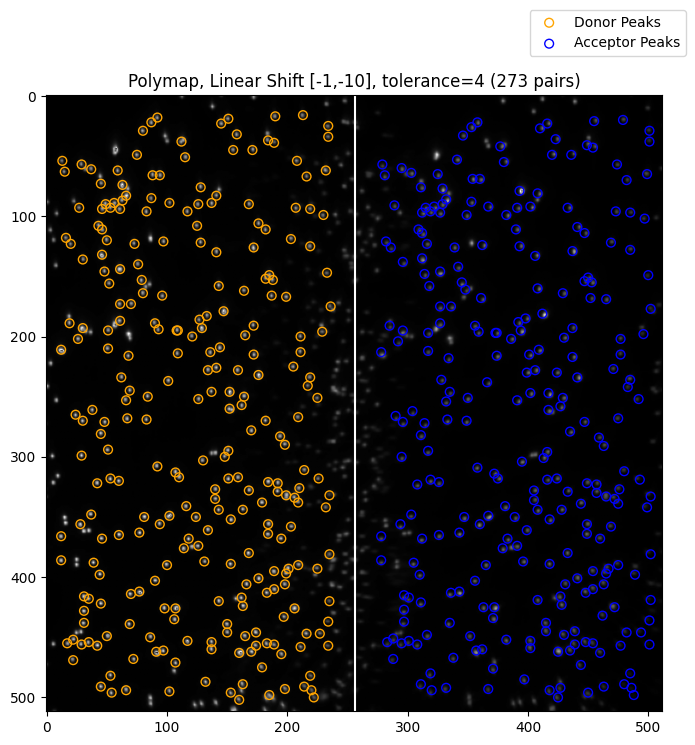

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(image, cmap="gray")
plt.title(f"Polymap, Linear Shift [-1,-10], tolerance=4 ({len(poly_pair_CH1)} pairs)")
plt.scatter(poly_pair_CH1[:, 1], poly_pair_CH1[:, 0], s=40, facecolors='none', edgecolors='orange', label='Donor Peaks')
plt.scatter(poly_pair_CH2[:, 1], poly_pair_CH2[:, 0], s=40, facecolors='none', edgecolors='b', label='Acceptor Peaks')
plt.axvline(x=256, color="w", linestyle='-', linewidth=1.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.15))

plt.show()